In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
import random
from cnn_forward import *

seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

In [4]:
x_train = x_train/255.0
x_val = x_val/255.0
x_test = x_test/255.0

In [5]:
x_train.shape

(45000, 32, 32, 3)

### Pengaruh Jumlah Layer Konvolusi

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

print("--- Arsitektur Model A (1 Layer Konvolusi) ---")
model_A = keras.Sequential([
    # Blok Konvolusi 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Bagian Dense / Fully Connected
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5), # Regularisasi untuk mencegah overfitting
    layers.Dense(10, activation='softmax') # Output layer
])

model_A.summary()

model_A.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

--- Arsitektur Model A (1 Layer Konvolusi) ---


c:\Users\konst\.conda\envs\waruds\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       921,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 923,914 (3.52 MB)

 Trainable params: 923,914 (3.52 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

print("--- Arsitektur Model B (2 Layer Konvolusi) ---")
model_B = keras.Sequential([
    # Blok Konvolusi 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Blok Konvolusi 2
    layers.Conv2D(32, (3, 3), activation='relu'), # Jumlah filter digandakan
    layers.MaxPooling2D((2, 2)),

    # Bagian Dense / Fully Connected
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5), # Regularisasi untuk mencegah overfitting
    layers.Dense(10, activation='softmax') # Output layer
])

model_B.summary()
model_B.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

--- Arsitektur Model B (2 Layer Konvolusi) ---


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159,018 (621.16 KB)

 Trainable params: 159,018 (621.16 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

print("--- Arsitektur Model C (3 Layer Konvolusi) ---")
model_C = keras.Sequential([
    # Blok Konvolusi 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Blok Konvolusi 2
    layers.Conv2D(32, (3, 3), activation='relu'), # Jumlah filter digandakan
    layers.MaxPooling2D((2, 2)),

    # Blok Konvolusi 3
    layers.Conv2D(32, (3, 3), activation='relu'), # Jumlah filter digandakan lagi
    layers.MaxPooling2D((2, 2)),

    # Bagian Dense / Fully Connected
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5), # Regularisasi untuk mencegah overfitting
    layers.Dense(10, activation='softmax') # Output layer
])
model_C.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
model_C.summary()

--- Arsitektur Model C (3 Layer Konvolusi) ---


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,194 (145.29 KB)

 Trainable params: 37,194 (145.29 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model_A_hist = model_A.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))
model_B_hist = model_B.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))
model_C_hist = model_C.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.3474 - loss: 1.7996 - val_accuracy: 0.5226 - val_loss: 1.3354
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5044 - loss: 1.3879 - val_accuracy: 0.5594 - val_loss: 1.2373
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5426 - loss: 1.2824 - val_accuracy: 0.5970 - val_loss: 1.1451
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5726 - loss: 1.2028 - val_accuracy: 0.6100 - val_loss: 1.1044
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5925 - loss: 1.1431 - val_accuracy: 0.6174 - val_loss: 1.0678
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6123 - loss: 1.0867 - val_accuracy: 0.6264 - val_loss: 1.0511
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6299 - loss: 1.0409 - val_accuracy: 0.6420 - val_loss: 1.0131
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6399 - loss: 0.9995 - val_accuracy: 0.

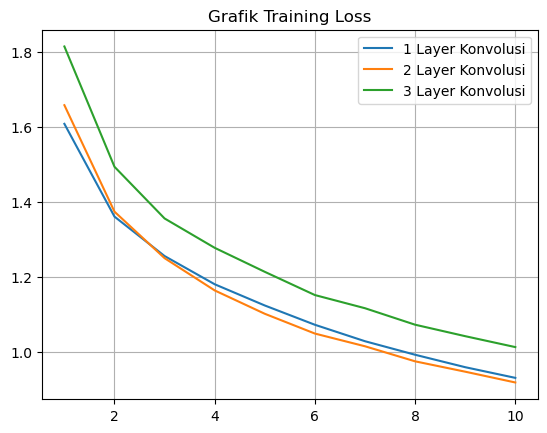

In [10]:
plt.plot(range(1,11),model_A_hist.history['loss'], label = '1 Layer Konvolusi')
plt.plot(range(1,11), model_B_hist.history['loss'], label = '2 Layer Konvolusi')
plt.plot(range(1,11), model_C_hist.history['loss'], label = '3 Layer Konvolusi')
plt.legend()
plt.title('Grafik Training Loss')
plt.grid(True)
plt.show()

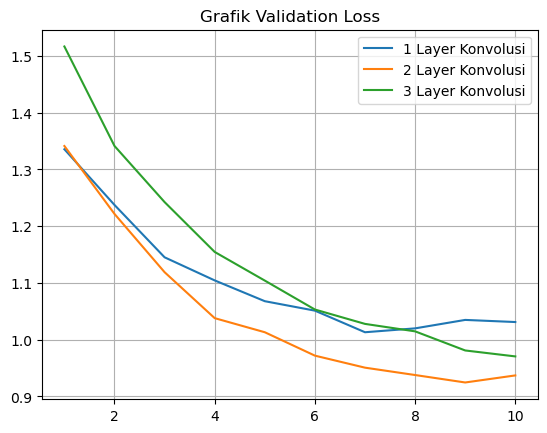

In [11]:
plt.plot(range(1,11),model_A_hist.history['val_loss'], label = '1 Layer Konvolusi')
plt.plot(range(1,11), model_B_hist.history['val_loss'], label = '2 Layer Konvolusi')
plt.plot(range(1,11), model_C_hist.history['val_loss'], label = '3 Layer Konvolusi')
plt.legend()
plt.title('Grafik Validation Loss')
plt.grid(True)
plt.show()

In [12]:
y_pred_A = np.argmax(model_A.predict(x_test), axis=1)
y_pred_B = np.argmax(model_B.predict(x_test), axis=1)
y_pred_C = np.argmax(model_C.predict(x_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [13]:
# Hitung Macro-F1 Score
from sklearn.metrics import f1_score

f1_A = f1_score(y_test, y_pred_A, average='macro')
print("F1 Score (Macro) 1 Layer Konvolusi:", f1_A)

f1_B = f1_score(y_test, y_pred_B, average='macro')
print("F1 Score (Macro) 2 Layer Konvolusi:", f1_B)

f1_C = f1_score(y_test, y_pred_C, average='macro')
print("F1 Score (Macro) 3 Layer Konvolusi:", f1_C)

F1 Score (Macro) 1 Layer Konvolusi: 0.6367683198494062
F1 Score (Macro) 2 Layer Konvolusi: 0.6718055835711667
F1 Score (Macro) 3 Layer Konvolusi: 0.6512677134674753


### Pengaruh Banyak Filter per Layer Konvolusi

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

print("--- Arsitektur Model D (64 Filter) ---")
model_D = keras.Sequential([
    # Blok Konvolusi 1
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Blok Konvolusi 2
    layers.Conv2D(64, (3, 3), activation='relu'), # Jumlah filter digandakan
    layers.MaxPooling2D((2, 2)),

    # Bagian Dense / Fully Connected
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5), # Regularisasi untuk mencegah overfitting
    layers.Dense(10, activation='softmax') # Output layer
])

model_D.summary()
model_D.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

--- Arsitektur Model D (64 Filter) ---


c:\Users\konst\.conda\envs\waruds\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 335,050 (1.28 MB)

 Trainable params: 335,050 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
from tensorflow import keras
from tensorflow.keras import layers

print("--- Arsitektur Model E (128 Filter) ---")
model_E = keras.Sequential([
    # Blok Konvolusi 1
    layers.Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Blok Konvolusi 2
    layers.Conv2D(128, (3, 3), activation='relu'), # Jumlah filter digandakan
    layers.MaxPooling2D((2, 2)),

    # Bagian Dense / Fully Connected
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5), # Regularisasi untuk mencegah overfitting
    layers.Dense(10, activation='softmax') # Output layer
])

model_E.summary()
model_E.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

--- Arsitektur Model E (128 Filter) ---


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 30, 30, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 13, 13, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 742,410 (2.83 MB)

 Trainable params: 742,410 (2.83 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
from tensorflow import keras
from tensorflow.keras import layers

print("--- Arsitektur Model F (256 Filter) ---")
model_F = keras.Sequential([
    # Blok Konvolusi 1
    layers.Conv2D(256, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Blok Konvolusi 2
    layers.Conv2D(256, (3, 3), activation='relu'), # Jumlah filter digandakan
    layers.MaxPooling2D((2, 2)),

    # Bagian Dense / Fully Connected
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5), # Regularisasi untuk mencegah overfitting
    layers.Dense(10, activation='softmax') # Output layer
])

model_F.summary()
model_F.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

--- Arsitektur Model F (256 Filter) ---


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 30, 30, 256)    │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 15, 15, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 13, 13, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,778,314 (6.78 MB)

 Trainable params: 1,778,314 (6.78 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model_D_hist = model_D.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))
model_E_hist = model_E.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))
model_F_hist = model_F.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.3075 - loss: 1.8741 - val_accuracy: 0.5216 - val_loss: 1.3293
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.4910 - loss: 1.4183 - val_accuracy: 0.5930 - val_loss: 1.1537
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.5553 - loss: 1.2528 - val_accuracy: 0.6320 - val_loss: 1.0549
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.5908 - loss: 1.1523 - val_accuracy: 0.6362 - val_loss: 1.0369
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6164 - loss: 1.0848 - val_accuracy: 0.6522 - val_loss: 0.9745
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.6353 - loss: 1.0317 - val_accuracy: 0.6666 - val_loss: 0.9467
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.6551 - loss: 0.9872 - val_accuracy: 0.6728 - val_loss: 0.9235
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6708 - loss: 0.9352 - v

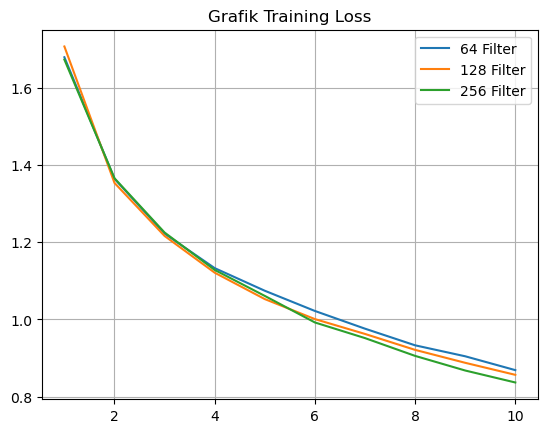

In [18]:
plt.plot(range(1,11),model_D_hist.history['loss'], label = '64 Filter')
plt.plot(range(1,11), model_E_hist.history['loss'], label = '128 Filter')
plt.plot(range(1,11), model_F_hist.history['loss'], label = '256 Filter')
plt.legend()
plt.title('Grafik Training Loss')
plt.grid(True)
plt.show()

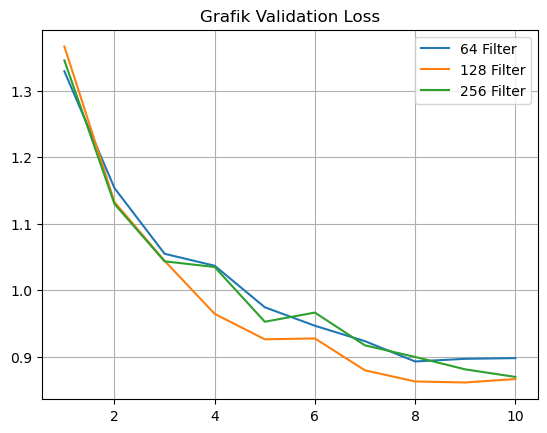

In [19]:
plt.plot(range(1,11),model_D_hist.history['val_loss'], label = '64 Filter')
plt.plot(range(1,11), model_E_hist.history['val_loss'], label = '128 Filter')
plt.plot(range(1,11), model_F_hist.history['val_loss'], label = '256 Filter')
plt.legend()
plt.title('Grafik Validation Loss')
plt.grid(True)
plt.show()

In [20]:
y_pred_D = np.argmax(model_D.predict(x_test), axis=1)
y_pred_E = np.argmax(model_E.predict(x_test), axis=1)
y_pred_F = np.argmax(model_F.predict(x_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step


In [21]:
# Hitung Macro-F1 Score
from sklearn.metrics import f1_score

f1_D = f1_score(y_test, y_pred_D, average='macro')
print("F1 Score (Macro) 64 Filter:", f1_D)

f1_E = f1_score(y_test, y_pred_E, average='macro')
print("F1 Score (Macro) 128 Filter:", f1_E)

f1_F = f1_score(y_test, y_pred_F, average='macro')
print("F1 Score (Macro) 256 Filter:", f1_F)

F1 Score (Macro) 64 Filter: 0.6878607186829633
F1 Score (Macro) 128 Filter: 0.6967526017190118
F1 Score (Macro) 256 Filter: 0.7009668934343798


### Pengaruh Ukuran Filter

In [22]:
from tensorflow import keras
from tensorflow.keras import layers

print("--- Arsitektur Model G (2 * 2) ---")
model_G = keras.Sequential([
    # Blok Konvolusi 1
    layers.Conv2D(64, (2, 2), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Blok Konvolusi 2
    layers.Conv2D(64, (2, 2), activation='relu'), # Jumlah filter digandakan
    layers.MaxPooling2D((2, 2)),

    # Blok Konvolusi 3
    layers.Conv2D(64, (2, 2), activation='relu'), # Jumlah filter digandakan lagi
    layers.MaxPooling2D((2, 2)),

    # Bagian Dense / Fully Connected
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5), # Regularisasi untuk mencegah overfitting
    layers.Dense(10, activation='softmax') # Output layer
])
model_G.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
model_G.summary()

--- Arsitektur Model G (2 * 2) ---


c:\Users\konst\.conda\envs\waruds\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 31, 31, 64)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 14, 14, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 6, 6, 64)       │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,874 (425.29 KB)

 Trainable params: 108,874 (425.29 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
from tensorflow import keras
from tensorflow.keras import layers

print("--- Arsitektur Model H (3* 3) ---")
model_H = keras.Sequential([
    # Blok Konvolusi 1
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Blok Konvolusi 2
    layers.Conv2D(64, (3, 3), activation='relu'), # Jumlah filter digandakan
    layers.MaxPooling2D((2, 2)),

    # Blok Konvolusi 3
    layers.Conv2D(64, (3, 3), activation='relu'), # Jumlah filter digandakan lagi
    layers.MaxPooling2D((2, 2)),

    # Bagian Dense / Fully Connected
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5), # Regularisasi untuk mencegah overfitting
    layers.Dense(10, activation='softmax') # Output layer
])
model_H.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
model_H.summary()

--- Arsitektur Model H (3* 3) ---


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,834 (429.04 KB)

 Trainable params: 109,834 (429.04 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
from tensorflow import keras
from tensorflow.keras import layers

print("--- Arsitektur Model I (4 * 4) ---")
model_I = keras.Sequential([
    # Blok Konvolusi 1
    layers.Conv2D(64, (4, 4), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Blok Konvolusi 2
    layers.Conv2D(64, (4, 4), activation='relu'), # Jumlah filter digandakan
    layers.MaxPooling2D((2, 2)),

    # Blok Konvolusi 3
    layers.Conv2D(64, (4, 4), activation='relu'), # Jumlah filter digandakan lagi
    layers.MaxPooling2D((2, 2)),

    # Bagian Dense / Fully Connected
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5), # Regularisasi untuk mencegah overfitting
    layers.Dense(10, activation='softmax') # Output layer
])
model_I.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
model_I.summary()

--- Arsitektur Model I (4 * 4) ---


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 29, 29, 64)     │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 11, 11, 64)     │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 2, 2, 64)       │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 143,946 (562.29 KB)

 Trainable params: 143,946 (562.29 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model_G_hist = model_G.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))
model_H_hist = model_H.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))
model_I_hist = model_I.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.2690 - loss: 1.9590 - val_accuracy: 0.4916 - val_loss: 1.3925
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.4697 - loss: 1.4578 - val_accuracy: 0.5608 - val_loss: 1.2234
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5316 - loss: 1.3128 - val_accuracy: 0.5984 - val_loss: 1.1177
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5671 - loss: 1.2072 - val_accuracy: 0.6230 - val_loss: 1.0446
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.6020 - loss: 1.1207 - val_accuracy: 0.6488 - val_loss: 0.9798
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.6242 - loss: 1.0615 - val_accuracy: 0.6606 - val_loss: 0.9435
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.6467 - loss: 1.0134 - val_accuracy: 0.6704 - val_loss: 0.9092
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.6622 - loss: 0.9710 - 

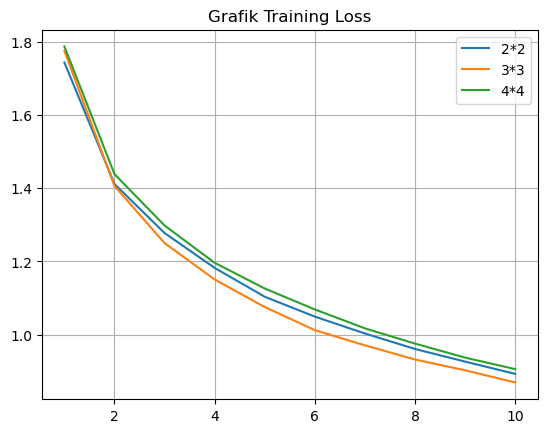

In [26]:
plt.plot(range(1,11),model_G_hist.history['loss'], label = '2*2')
plt.plot(range(1,11), model_H_hist.history['loss'], label = '3*3')
plt.plot(range(1,11), model_I_hist.history['loss'], label = '4*4')
plt.legend()
plt.title('Grafik Training Loss')
plt.grid(True)
plt.show()

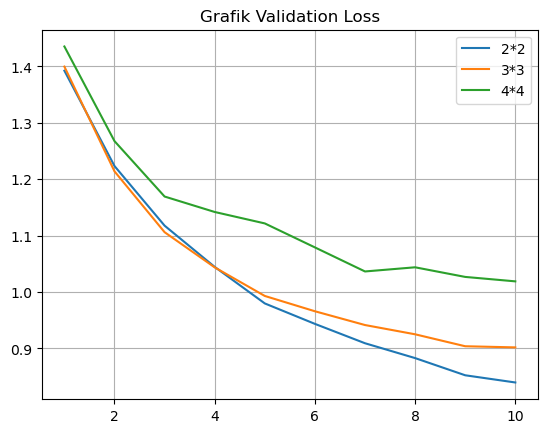

In [27]:
plt.plot(range(1,11),model_G_hist.history['val_loss'], label = '2*2')
plt.plot(range(1,11), model_H_hist.history['val_loss'], label = '3*3')
plt.plot(range(1,11), model_I_hist.history['val_loss'], label = '4*4')
plt.legend()
plt.title('Grafik Validation Loss')
plt.grid(True)
plt.show()

In [28]:
y_pred_G = np.argmax(model_G.predict(x_test), axis=1)
y_pred_H = np.argmax(model_H.predict(x_test), axis=1)
y_pred_I = np.argmax(model_I.predict(x_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [29]:
# Hitung Macro-F1 Score
from sklearn.metrics import f1_score

f1_G = f1_score(y_test, y_pred_G, average='macro')
print("F1 Score (Macro) 64 Filter:", f1_G)

f1_H = f1_score(y_test, y_pred_H, average='macro')
print("F1 Score (Macro) 128 Filter:", f1_H)

f1_I = f1_score(y_test, y_pred_I, average='macro')
print("F1 Score (Macro) 256 Filter:", f1_I)

F1 Score (Macro) 64 Filter: 0.6936837813783274
F1 Score (Macro) 128 Filter: 0.6779743822151718
F1 Score (Macro) 256 Filter: 0.6419905991769657


### Pengaruh Jenis Pooling Layer

In [30]:
from tensorflow import keras
from tensorflow.keras import layers

print("--- Arsitektur Model J (Max Pooling) ---")
model_J = keras.Sequential([
    # Blok Konvolusi 1
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Blok Konvolusi 2
    layers.Conv2D(128, (3, 3), activation='relu'), # Jumlah filter digandakan
    layers.MaxPooling2D((2, 2)),

    # Blok Konvolusi 3
    layers.Conv2D(256, (3, 3), activation='relu'), # Jumlah filter digandakan lagi
    layers.MaxPooling2D((2, 2)),

    # Bagian Dense / Fully Connected
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5), # Regularisasi untuk mencegah overfitting
    layers.Dense(10, activation='softmax') # Output layer
])
model_J.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
model_J.summary()

--- Arsitektur Model J (Max Pooling) ---


c:\Users\konst\.conda\envs\waruds\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 503,306 (1.92 MB)

 Trainable params: 503,306 (1.92 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
from tensorflow import keras
from tensorflow.keras import layers

print("--- Arsitektur Model K (Average Pooling) ---")
model_K = keras.Sequential([
    # Blok Konvolusi 1
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.AveragePooling2D((2, 2)),

    # Blok Konvolusi 2
    layers.Conv2D(128, (3, 3), activation='relu'), # Jumlah filter digandakan
    layers.AveragePooling2D((2, 2)),

    # Blok Konvolusi 3
    layers.Conv2D(256, (3, 3), activation='relu'), # Jumlah filter digandakan lagi
    layers.AveragePooling2D((2, 2)),

    # Bagian Dense / Fully Connected
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5), # Regularisasi untuk mencegah overfitting
    layers.Dense(10, activation='softmax') # Output layer
])
model_K.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
model_K.summary()

--- Arsitektur Model K (Average Pooling) ---


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 15, 15, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 6, 6, 128)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 2, 2, 256)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 503,306 (1.92 MB)

 Trainable params: 503,306 (1.92 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model_J_hist = model_J.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))
model_K_hist = model_K.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.2873 - loss: 1.9168 - val_accuracy: 0.5344 - val_loss: 1.3173
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.5126 - loss: 1.3655 - val_accuracy: 0.6088 - val_loss: 1.0842
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.5965 - loss: 1.1493 - val_accuracy: 0.6458 - val_loss: 0.9955
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.6492 - loss: 1.0029 - val_accuracy: 0.6752 - val_loss: 0.9122
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.6877 - loss: 0.8988 - val_accuracy: 0.7014 - val_loss: 0.8506
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.7208 - loss: 0.8137 - val_accuracy: 0.7094 - val_loss: 0.8395
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.7439 - loss: 0.7368 - val_accuracy: 0.7162 - val_loss: 0.8323
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.7726 - loss: 0.6621 - 

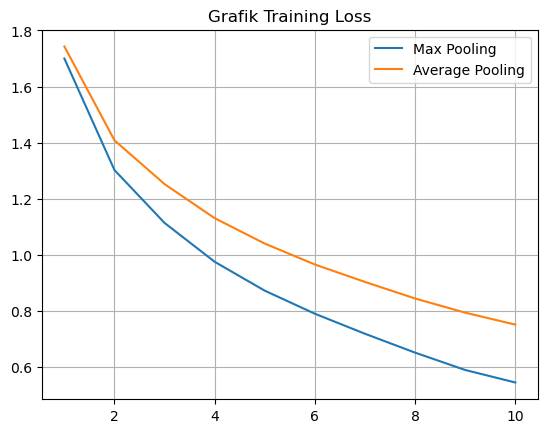

In [33]:
plt.plot(range(1,11),model_J_hist.history['loss'], label = 'Max Pooling')
plt.plot(range(1,11), model_K_hist.history['loss'], label = 'Average Pooling')
plt.legend()
plt.title('Grafik Training Loss')
plt.grid(True)
plt.show()

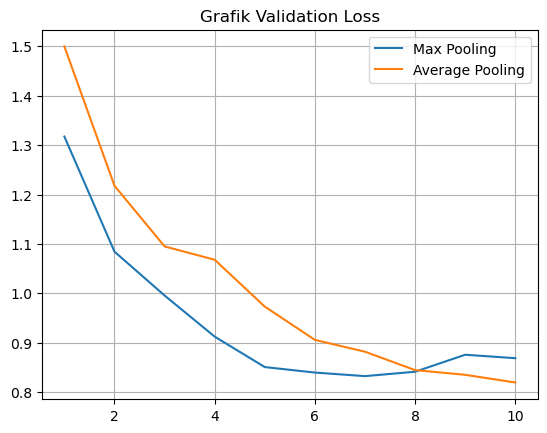

In [37]:
plt.plot(range(1,11),model_J_hist.history['val_loss'], label = 'Max Pooling')
plt.plot(range(1,11), model_K_hist.history['val_loss'], label = 'Average Pooling')
plt.legend()
plt.title('Grafik Validation Loss')
plt.grid(True)
plt.show()

In [35]:
y_pred_J = np.argmax(model_J.predict(x_test), axis=1)
y_pred_K = np.argmax(model_K.predict(x_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [36]:
# Hitung Macro-F1 Score
from sklearn.metrics import f1_score

f1_J = f1_score(y_test, y_pred_J, average='macro')
print("F1 Score (Macro) Max Pooling:", f1_J)

f1_K = f1_score(y_test, y_pred_K, average='macro')
print("F1 Score (Macro) Average Pooling:", f1_K)


F1 Score (Macro) Max Pooling: 0.7205753089137423
F1 Score (Macro) Average Pooling: 0.7121522351601233
